# Dimensionality reduction using Principal Components Analysis (PCA)
---
## Overview
Here we will switch gears and turn our attention to PCA, which is an eigenvalue decomposition technique.


## Required modules

This practical requires the following Python modules (_These should be already installed when you install FSL_)


> * `numpy`
> * `matplotlib`
> * `scipy`
> * `pandas`
> * `skimage`

First, we will import the necessary packages for this notebook:

In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import skimage as ski
import skimage.io
import ipywidgets as widgets

## figure styling
mpl.rcParams['figure.figsize'] = (5,4)
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.grid.axis'] = 'y'
mpl.rcParams['grid.color'] = '#d3d3d3'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 1
mpl.rcParams['grid.alpha'] = 1

---
## PCA of data clouds
Let's generate a 2D data cloud. The following code generates data that follows a Gaussian distribution with a covariance matrix that has a 60 degree rotation with respect to the x-axis. Read the code carefully and try to understand all the different steps.



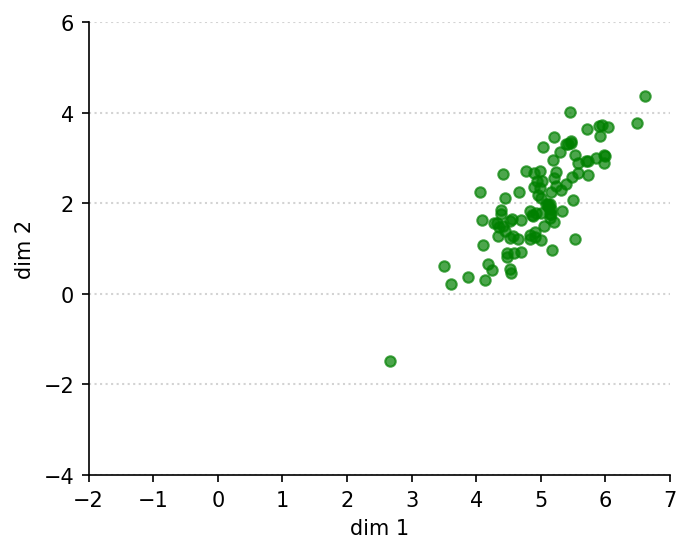

In [2]:
# mean position
mu = np.array([5,2])

# angle in degrees
ang = 60;

# rotation matrix
ang_rad = np.radians(ang)
R = np.array([
        [np.cos(ang_rad), -np.sin(ang_rad)],
        [np.sin(ang_rad),  np.cos(ang_rad)],
])

# rotated covariance matrix
sig = R @ np.array([[1.3, 0], [0, .1]]) @ R.transpose()

# create points using multivariate gaussian random
y = np.random.multivariate_normal(mu, sig, 100)

# plot the data
plt.plot(y[: , 0], y[: , 1], 'go', alpha=0.7, markersize=5)
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.xlim([-2, 7])
plt.ylim([-4, 6])
plt.show()

Let's actually plot the data alongside the demeaned data:

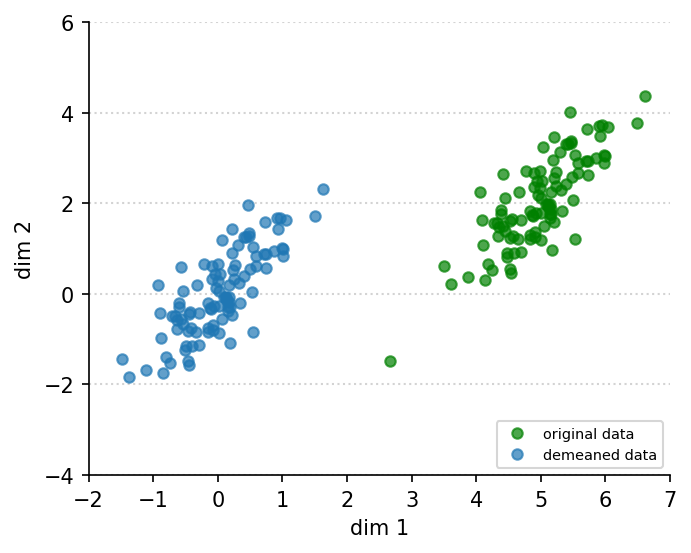

In [3]:
ydemean = y - np.mean(y,axis=0)
plt.plot(y[:,0], y[:,1], 'go', alpha=0.7, markersize=5)
plt.plot(ydemean[:,0], ydemean[:,1], 'o', alpha=0.7, markersize=5)
plt.xlim([-2, 7])
plt.ylim([-4, 6])
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.legend(['original data', 'demeaned data'], loc=4, fontsize='x-small')
plt.show()

Next, calculate the eigenvalue decomposition of the covariance matrix and plot the eigenvectors scaled by the square-root of their eigenvalues:

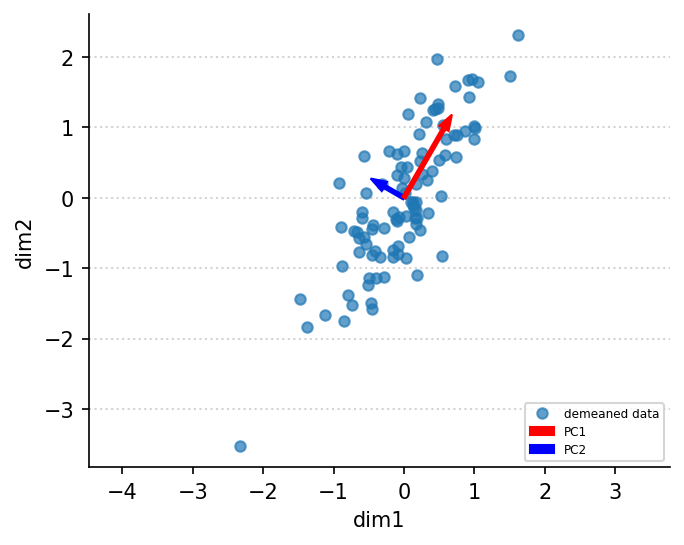

In [4]:
d,v = np.linalg.eigh(np.cov(y.T))
d   = np.sqrt(d)

# Plot the two eigenvectors
l1 = plt.plot(ydemean[:,0], ydemean[:,1], 'o', alpha=0.7, markersize=5)
l2 = plt.arrow(0,0,d[1]*v[0,1],d[1]*v[1,1],color='r',width=0.05,zorder=20)   # major eigenvector
l3 = plt.arrow(0,0,d[0]*v[0,0],d[0]*v[1,0],color='b',width=0.05,zorder=10)   # minor eigenvector
plt.legend([l1[0], l2, l3], ['demeaned data', 'PC1', 'PC2'], loc=4, fontsize='xx-small')

plt.axis('equal')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.show()

Note that I have used Numpy's `eigh` instead of `eig`. This is to tell Numpy that the matrix is symmetric, so all the eigenvalues and eigenvectors are made of real numbers.

It should be clear that the major eigenvector (in red) is aligned with the direction of most "variance" in the data, and that the minor eigenvector is orthogonal to the major one, and is aligned with the direction of least variance. This is true because we have calculated the eigenvectors of the covariance matrix, which is always a symmetric matrix, and therefore the eigenvectors are orthogonal to each other and point in directions of most and least "magnitude".

Now project the data onto the first eigenvector and plot the projected data. This is done by first multiplying the demeaned data by the principal eigenvector. This creates a "1D" data set. Then we multiply by the transpose of this eigenvector. This creates a 2D datasets (so we can plot it alongside the original data), but the data actually "lives" in a 1D line aligned with the eigenvector.

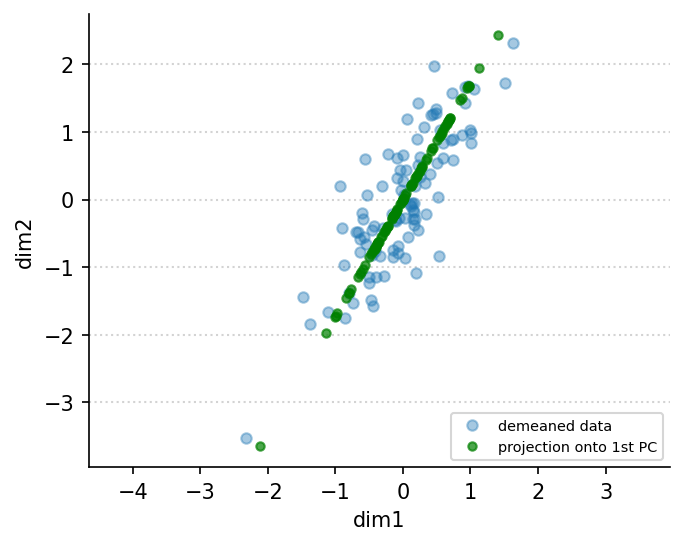

In [5]:
yy = (ydemean @ v[:,1].reshape(-1,1))*v[:,1].reshape(1,-1)
plt.plot(ydemean[:,0],ydemean[:,1], 'o', alpha=0.4, markersize=5)
plt.plot(yy[:,0],yy[:,1],'go', alpha=0.7, markersize=4)
plt.axis('equal')
plt.legend(['demeaned data', 'projection onto 1st PC'], loc=4, fontsize='x-small')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.show()

Now we do the same thing, but this time on a data set that does not have an interesting direction of maximum variance, but instead has information that is cast along a "radial" dimension.

Start by generating the doughnut data set (make sure you understand what each line is doing in the following code):

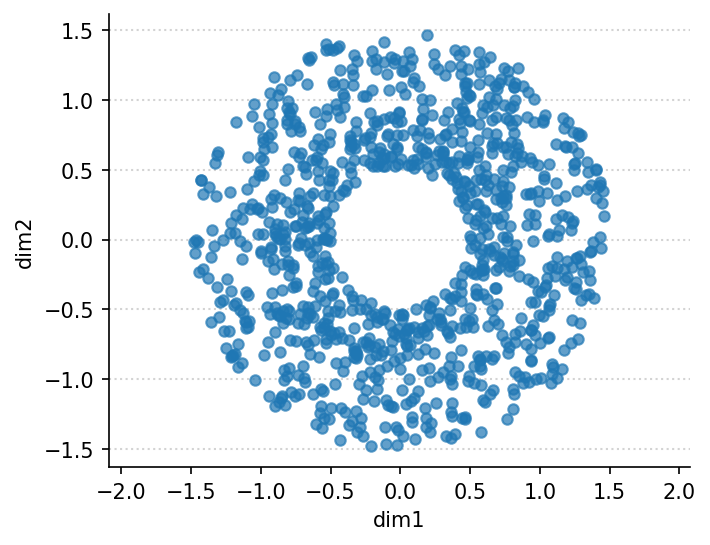

In [6]:
t = 2*np.pi*np.random.rand(1000,1) # random angle
r = .5+np.random.rand(1000,1)      # random radius between .5 and 1.5
x = r*np.sin(t)
y = r*np.cos(t);

plt.plot(x,y,'o', alpha=0.7, markersize=5)
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.axis('equal')
plt.show()

Now we do a PCA on this data in exactly the same manner as before by calculating the eigenvalues of the covariance matrix:



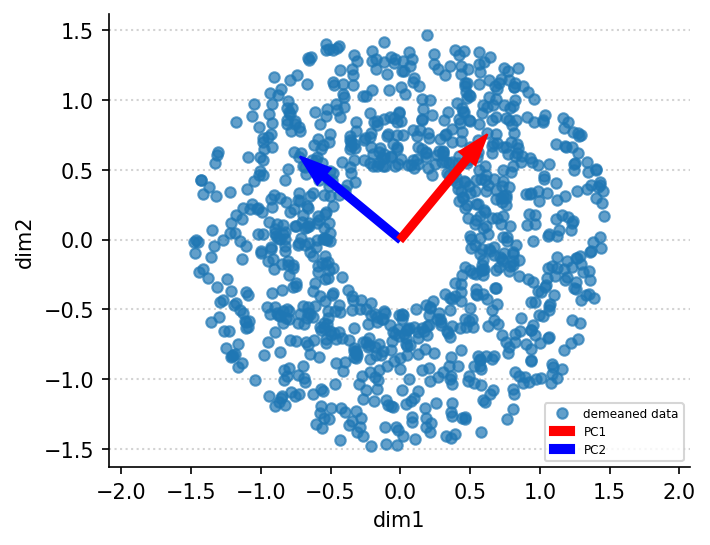

In [7]:
Y   = np.concatenate([x, y], axis=1)
d,v = np.linalg.eigh(np.cov(Y.T))
d   = np.sqrt(np.abs(d))

l1 = plt.plot(x, y, 'o', alpha=0.7, markersize=5)
l2 = plt.arrow(0,0,d[1]*v[0,1],d[1]*v[1,1],color='r',width=0.05,zorder=20)   # major eigenvector
l3 = plt.arrow(0,0,d[0]*v[0,0],d[0]*v[1,0],color='b',width=0.05,zorder=10)   # minor eigenvector
plt.legend([l1[0], l2, l3], ['demeaned data', 'PC1', 'PC2'], loc=4, fontsize='xx-small')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.axis('equal')
plt.show()

The resuting directions, as you can see, do not indicate any particularly useful feature of the data. In fact, they are completely random (driven by the noise, since the model is completely symmetric).

Furthermore, if we project the data onto the mean eigenvector, we loose all information on the doughnut:

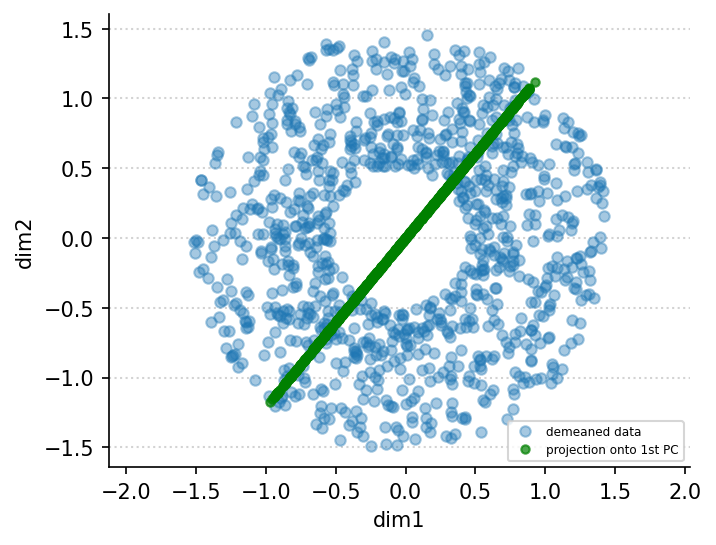

In [8]:
ydemean = Y - np.mean(Y, axis=0)
yy = (ydemean @ v[:,1].reshape(-1,1))*v[:,1].reshape(1,-1)

plt.plot(ydemean[:,0], ydemean[:,1], 'o', alpha=0.4, markersize=5)
plt.plot(yy[:,0],      yy[:,1], 'go', alpha=0.7, markersize=4)
plt.legend(['demeaned data', 'projection onto 1st PC'], loc=4, fontsize='xx-small')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.axis('equal')
plt.show()

So the lesson here is that PCA does not always make sense. The doughnut data actually existed on a "manifold" which means other types of techniques called "manifold learning" may have been more appropriate. These methods are different to PCA. While PCA cares about the overall dataset as a whole and tries to find directions that maximise the variance, manifold learning cares about small neighbourhoods in the data and "local" structure.

Now let us do one last data-cloud example. Consider the data generated with the following bit of code:

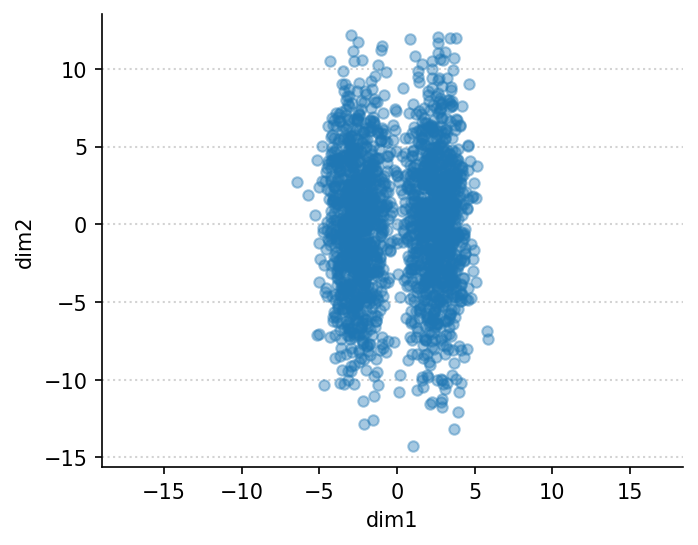

In [9]:
y1 = np.random.multivariate_normal(np.array([0,0]),
                                   np.array([[1,0],[0,20]]),
                                   1000)
y2 = np.random.multivariate_normal(np.array([5,0]),
                                    np.array([[1,0],[0,20]]),
                                    1000);
y = np.concatenate([y1,y2],axis=0)
y = y - np.mean(y, axis=0)    # demeand the data to keep things simple


plt.plot(y[:,0],y[:,1],'o', alpha=0.4, markersize=5)
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.axis('equal')
plt.show()

As you can see, the data comes in two interesting clusters. However, the direction of maximum variance is orthogonal to the direction that separates the two clusters. Let's see how this affects the results of a data reduction that uses PCA.

First calculate the eigenspectrum of the covariance matrix and plot the major and minor eigenvectors:

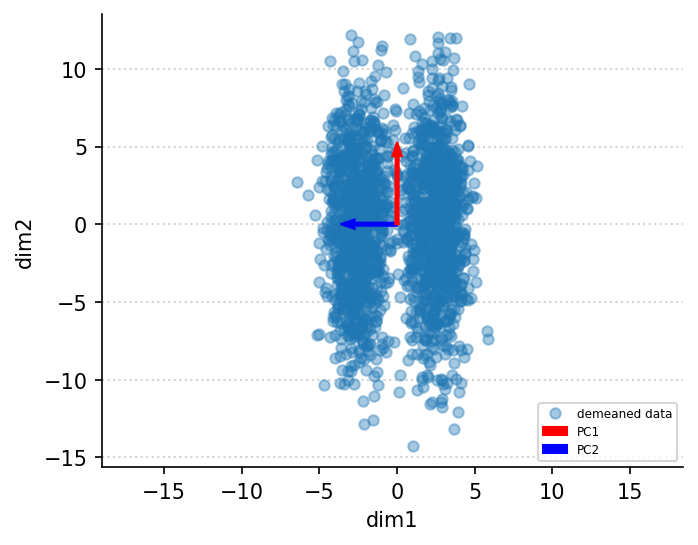

In [10]:
d,v = np.linalg.eigh(np.cov(y.T))
d   = np.sqrt(np.abs(d))

l1 = plt.plot(y[:,0],y[:,1],'o', alpha=0.4, markersize=5)
l2 = plt.arrow(0,0,d[1]*v[0,1],d[1]*v[1,1],color='r',width=0.2,zorder=20); # major eigenvector
l3 = plt.arrow(0,0,d[0]*v[0,0],d[0]*v[1,0],color='b',width=0.2,zorder=10); # minor eigenvector
plt.legend([l1[0], l2, l3], ['demeaned data', 'PC1', 'PC2'], loc=4, fontsize='xx-small')
plt.axis('equal')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.show()

Now project the data onto the first eigenvector. You can see that the cluster information is completely lost. PCA is not a good way to reduce the dimensionality of this data.



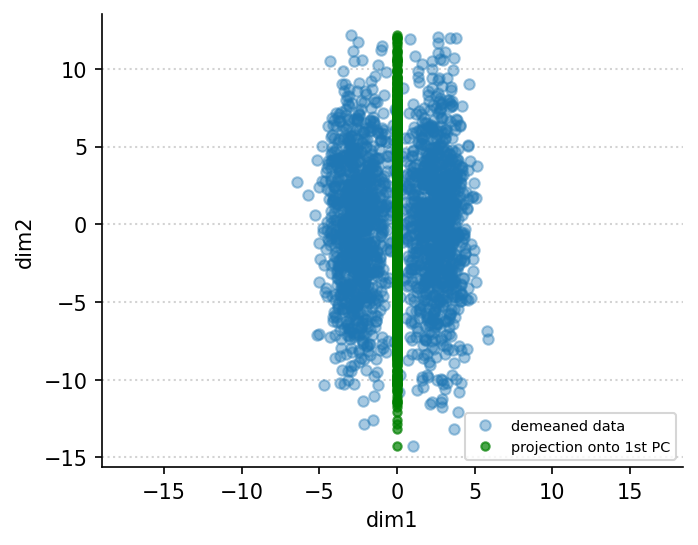

In [11]:
yy = (y @ v[:,1].reshape(-1,1)) @ v[:,1].reshape(1,-1);
plt.plot(y[:,0],y[:,1],'o', alpha=0.4, markersize=5)
plt.plot(yy[:,0],yy[:,1],'go', alpha=0.7, markersize=4)
plt.legend(['demeaned data', 'projection onto 1st PC'], loc=4, fontsize='x-small')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.axis('equal')
plt.show()

## PCA of the world

Let us finish with a fun example, PCA of the world map. I've chosen the world map because, although the data is multi-dimensional, which precludes from simple data-cloud style visualisation, information in the data can still be visualised as a matrix.

The data is in already in your working directory _(if it is not, download it from [here](http://www.fmrib.ox.ac.uk/~saad/ONBI/world-map.gif))_.

Now read in the data in Python and visualise it:

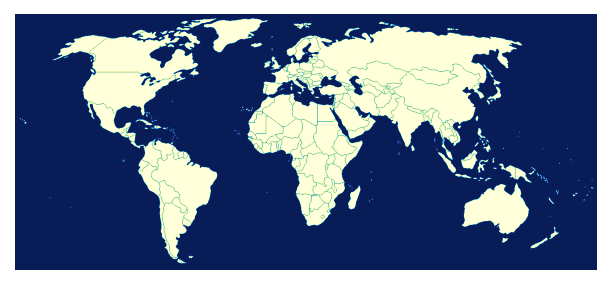

In [12]:
im = ski.io.imread('world-map.gif').astype('float64')  # read image
im = np.sum(im, axis=2)                  # sum across the three colour channels
plt.imshow(im, cmap='YlGnBu')                           # display the image
plt.axis('off')
plt.show()

Start by calculating the eigenspectrum of the data covariance matrix:



In [13]:
d,v = np.linalg.eigh(np.cov(im.T))

Now we are going to reduce the dimensionality of the data by reconstructing the data using a subset of the eigenvectors. To this end, we need to first demean the rows of the data matrix:



In [14]:
x = im.copy()
m = x.mean(axis=1)[:,None]
x = x-m

Next, reconstruct the data using only the top p eigenvectors. Look at what happens with and without adding the mean back to the data. Play with different values of p. When do we start seeing Great Britain?



In [15]:
@widgets.interact(p=widgets.IntSlider(min=1,max=50,step=1,value=4), continuous_update=False)
def show_im(p):
    # reconstruct the data with top p eigenvectors
    y = (x @ v[:,-p:]) @ v[:,-p:].T
    # plotting
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(3, 6))
    ax1.imshow(im, cmap='YlGnBu')
    ax1.set_title('original image')
    ax1.axis('off')
    ax2.imshow(y, cmap='YlGnBu')
    ax2.set_title('reconstructed')
    ax2.axis('off')
    ax3.imshow(y+m, cmap='YlGnBu')
    ax3.set_title('with mean added')
    ax3.axis('off')
    plt.show()


interactive(children=(IntSlider(value=4, description='p', max=50, min=1), Output()), _dom_classes=('widget-int…

Same as above but with [Queen Victoria](http://www.fmrib.ox.ac.uk/~saad/ONBI/Queen_Victoria_by_Bassano.jpg).

In [16]:
im = ski.io.imread('Queen_Victoria_by_Bassano.jpg').astype('float64')
im = np.sum(im, axis=2)

# reconstruct the data with top p eigenvectors
d,v = np.linalg.eigh(np.cov(im.T))

p = 4 # change this

x = im.copy()
m = x.mean(axis=1)[:,None]
x = x-m


@widgets.interact(p=widgets.IntSlider(min=1,max=50,step=1,value=4), continuous_update=False)
def show_im(p):
    # reconstruct the data with top p eigenvectors
    y = (x @ v[:,-p:]) @ v[:,-p:].T
    # plotting
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(3, 6))
    ax1.imshow(im, cmap='gray')
    ax1.set_title('original image')
    ax1.axis('off')
    ax2.imshow(y, cmap='gray')
    ax2.set_title('reconstructed')
    ax2.axis('off')
    ax3.imshow(y+m, cmap='gray')
    ax3.set_title('with mean added')
    ax3.axis('off')
    plt.show()

interactive(children=(IntSlider(value=4, description='p', max=50, min=1), Output()), _dom_classes=('widget-int…

As you can see PCA is pretty good at preserving key features of images even with a few eigenvectors. There are however much better techniques for image compression.